<a href="https://colab.research.google.com/github/yasiruKodikara/polynomial-regression-lesson-1/blob/main/PlynomialRegression_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Generating Dataset

In [ ]:
import numpy as np
np.random.seed(0)
x = 1 + 2 * np.random.normal(0,1,1000)
y = x + 1.5 * (x ** 2) + 0.8 * (x ** 3) + np.random.normal(0,3,1000)


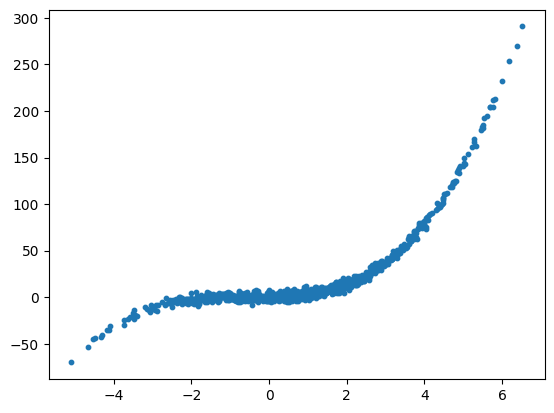

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x,y,s=10)
plt.show()

Split data set into 3 sets


In [ ]:
from sklearn.model_selection import train_test_split


X = x[:,np.newaxis]
y = y[:,np.newaxis]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size=0.25,random_state=1)

Train a Simple Linear Regression Model

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg_1 = LinearRegression()
lin_reg_1.fit(X_train,y_train)

print("Degree 1 - Training Error:",lin_reg_1.score(X_train,y_train))
print("Degree 1 - Validation Error:",lin_reg_1.score(X_val,y_val))

Degree 1 - Training Error: 0.6112766542009314
Degree 1 - Validation Error: 0.578092525888924


Train Polynomial Regression Models

Degree = 2

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly_regr = PolynomialFeatures(degree=2)

X_poly2 = poly_regr.fit_transform(X_train)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly2,y_train)



LinearRegression()

In [ ]:
X_poly_val2 = poly_regr.fit_transform(X_val)
print("Degree 2 - Training Error:",lin_reg_2.score(X_poly2,y_train))
print("Degree 2 - Validation Error:",lin_reg_2.score(X_poly_val2,y_val))

Degree 2 - Training Error: 0.8901821639950546
Degree 2 - Validation Error: 0.8567139925783426


Degree = 3

In [ ]:
poly_regr = PolynomialFeatures(degree=3)
X_poly3 = poly_regr.fit_transform(X_train)
lin_reg_3 = LinearRegression()
lin_reg_3.fit(X_poly3,y_train)

LinearRegression()

In [ ]:
X_poly_val3 = poly_regr.fit_transform(X_val)
print("Degree 3 - Training Error:",lin_reg_3.score(X_poly3,y_train))
print("Degree 3 - Validation Error:",lin_reg_3.score(X_poly_val3,y_val))

Degree 3 - Training Error: 0.9941068693023871
Degree 3 - Validation Error: 0.9941018868235563


Degree = 20


In [ ]:
# Degree 20 Polynomial Regression
poly_reg20 = PolynomialFeatures(degree=20)
X_poly20 = poly_reg20.fit_transform(X_train)
lin_reg_20 = LinearRegression()
lin_reg_20.fit(X_poly20, y_train)

X_poly_val20 = poly_reg20.transform(X_val)
print("Degree 20 - Training Error:",lin_reg_20.score(X_poly20,y_train))
print("Degree 20 - Validation Error:",lin_reg_20.score(X_poly_val20,y_val))

Degree 20 - Training Error: 0.9874220166170956
Degree 20 - Validation Error: -82.58334350405747


# Lets plot them

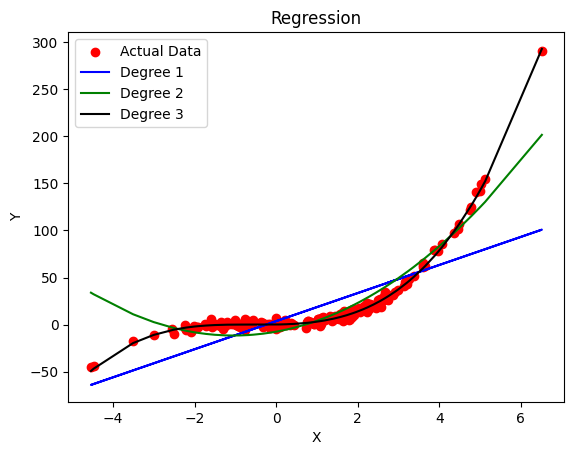

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
# Plotting all regression fits
plt.scatter(X_val, y_val, color='red', label='Actual Data')  # Actual data
plt.plot(X_val, lin_reg_1.predict(X_val), color='blue', label='Degree 1')  # Degree 1

# Degree 2
poly_regr_2 = PolynomialFeatures(degree=2)
X_val_poly2 = poly_regr_2.fit_transform(X_val.reshape(-1, 1))
x2, y2 = zip(*sorted(zip(X_val.flatten(), lin_reg_2.predict(X_val_poly2).flatten()), key=lambda x: x[0]))
plt.plot(x2, y2, color='green', label='Degree 2')

# Degree 3
poly_regr_3 = PolynomialFeatures(degree=3)
X_val_poly3 = poly_regr_3.fit_transform(X_val.reshape(-1, 1))
x3, y3 = zip(*sorted(zip(X_val.flatten(), lin_reg_3.predict(X_val_poly3).flatten()), key=lambda x: x[0]))
plt.plot(x3, y3, color='black', label='Degree 3')

plt.title('Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()